# Pymaceuticals Inc.
---

### Analysis

- This analysis contains data on all 249 mice using the various drugs provided for potential treatment for squamous cell carcinoma (SCC). There has been various dataframes created along with bar charts, pie charts, box plots, line plots, and scatter plots. I will go through the basic information provided by each generated infographic within the following. 
- Summary Statistics
    - This includes statistics such as mean, median, standard deviation, and more of tumor volume for each given treatment
    - Just based on the statistics provided through this table, it appears that Capomulin and Ramicane are the most promising in reducing tumor volume within mice over the time period given. 
- Bar Charts and Pie Charts
    -
- Box Plot
    -
- Line Plot
    -
- Scatter Plot, Correlation, and Regression
    -

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merge = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how="left")

# Display the data table for preview
data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
num_mice = data_merge["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# True results should display what rows have a duplicate within the DataFrame
ID_Timepoint_df = data_merge[["Mouse ID", "Timepoint"]]
dup_mouse = ID_Timepoint_df.value_counts() > 1
true_dup = dup_mouse.loc[dup_mouse == True]
true_dup


Mouse ID  Timepoint
g989      20           True
          15           True
          10           True
          5            True
          0            True
Name: count, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = data_merge.copy()
filtered_dup_df = dup_df[dup_df['Mouse ID'] == 'g989']
filtered_dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duped_mouse = 'g989'
clean_df = dup_df[dup_df['Mouse ID'] != duped_mouse]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = clean_df['Mouse ID'].nunique()
new_num_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
sum_stats_grouped = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_stats = sum_stats_grouped['Tumor Volume (mm3)'].mean()
median_stats = sum_stats_grouped['Tumor Volume (mm3)'].median()
var_stats = sum_stats_grouped['Tumor Volume (mm3)'].var()
stdev_stats = sum_stats_grouped['Tumor Volume (mm3)'].std()
SEM_stats = sum_stats_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
sum_stats = pd.DataFrame(
    {"Mean Tumor Volume": mean_stats,
     "Median Tumor Volume": median_stats,
     "Tumor Volume Variance": var_stats,
     "Tumor Volume Std. Dev.": stdev_stats,
     "Tumor Volume Std. Err.": SEM_stats
    }
)
sum_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#adv_summary_stats = clean_df.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', 'mean'),Median=('Tumor Volume (mm3)', 'median'),Variance=('Tumor Volume (mm3)', 'var'),StdDev=('Tumor Volume (mm3)', 'std'),SEM=('Tumor Volume (mm3)', 'sem'))
adv_summary_stats = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
adv_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

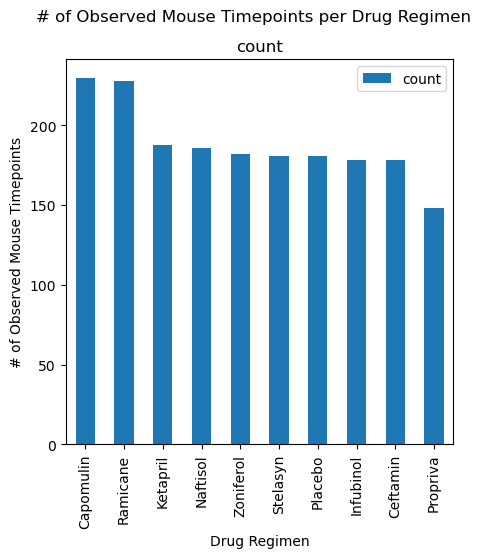

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

numID_per_Drug = clean_df["Drug Regimen"].value_counts()
numID_per_Drug_df = pd.DataFrame(numID_per_Drug)

numID_per_Drug_df.plot(kind="bar", figsize=(5, 5), title= "# of Observed Mouse Timepoints per Drug Regimen", ylabel = "# of Observed Mouse Timepoints", xlabel = "Drug Regimen", subplots = True);


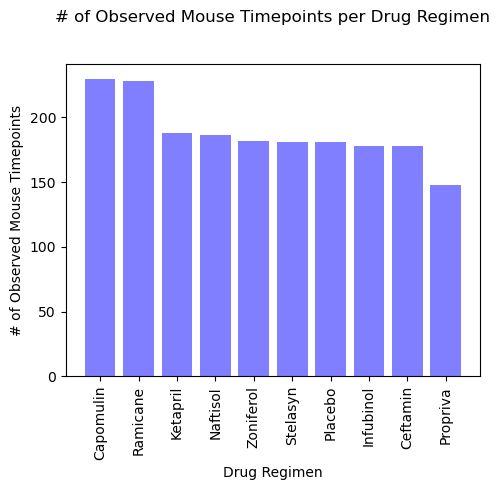

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(numID_per_Drug_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(5,5))
plt.bar(x_axis, numID_per_Drug_df["count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, numID_per_Drug_df.index, rotation="vertical")
plt.title("# of Observed Mouse Timepoints per Drug Regimen", pad=30)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout();

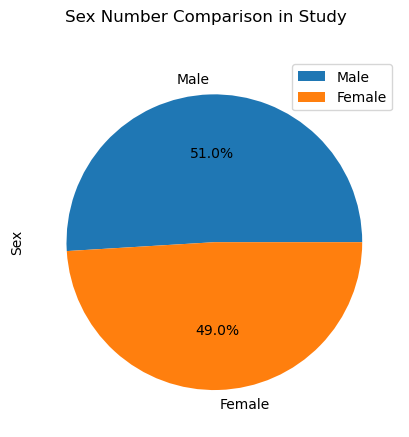

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sx_mice = clean_df["Sex"].value_counts()
sx_mice_df = pd.DataFrame(sx_mice)
sx_mice_df.plot(kind="pie", autopct = "%1.1f%%", title= "Sex Number Comparison in Study", subplots = True, ylabel = "Sex");


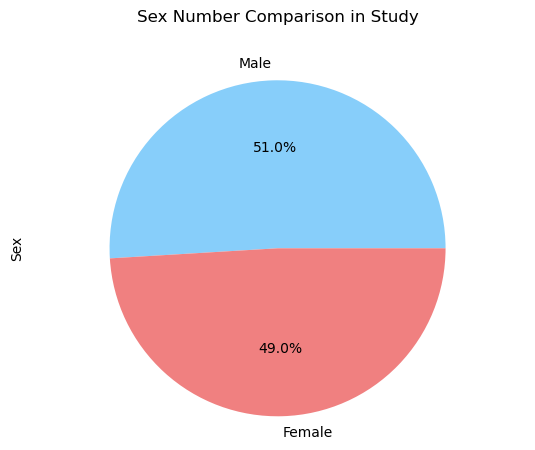

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sx_mice, labels = ["Male", "Female"], colors = ["lightskyblue", "lightcoral"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sex Number Comparison in Study", pad=30)
plt.ylabel("Sex")
plt.tight_layout;

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_TP_values = clean_df.groupby('Mouse ID')['Timepoint'].max()
great_TP_values

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
great_TP_merge = pd.merge(clean_df, great_TP_values, on= "Mouse ID", how="left")
great_TP_merge.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Max Timepoint'}, inplace=True)
great_TP_merge



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [14]:
great_TP_merge['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [70]:
# Put treatments into a list for for loop (and later for plot labels)
sample_treat = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_vol_data = {treatment: [] for treatment in sample_treat}

for index, drug in great_TP_merge.iterrows():
    if (drug['Timepoint'] == drug['Max Timepoint']) and (drug['Drug Regimen'] in sample_treat):
        final_vol_data[drug['Drug Regimen']].append(drug['Tumor Volume (mm3)'])

#convert list to dataframe
final_vol_df = pd.DataFrame(final_vol_data)
final_vol_df

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in sample_treat:
    quartiles = final_vol_df[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    drug_data = great_TP_merge[great_TP_merge['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    #print out potential outlier numbers per sample drug 
    print(f"{treatment} has {outliers.count()} potential outlier[s]: {outliers}")
    


Capomulin has 0 potential outlier[s]: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has 0 potential outlier[s]: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has 1 potential outlier[s]: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has 0 potential outlier[s]: Series([], Name: Tumor Volume (mm3), dtype: float64)


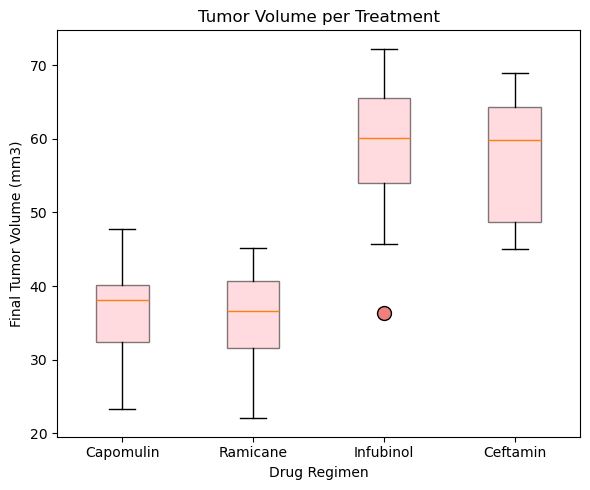

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(6,5))

positions = range(1, len(sample_treat) +1)

for i, treatment in enumerate(sample_treat):
    boxplot = ax.boxplot(final_vol_df[treatment], positions=[positions[i]], widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightpink', alpha =0.5), flierprops = dict(marker='o', markerfacecolor ='lightcoral', markersize=10))



ax.set_xticks(positions)
ax.set_xticklabels(sample_treat)
ax.set_title('Tumor Volume per Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')


plt.tight_layout()

## Line and Scatter Plots

In [17]:
#checking which mice are treated with Capomulin
capo = "Capomulin"
filter_capo_mouse = great_TP_merge[great_TP_merge['Drug Regimen'] == capo]
filter_capo_mouse['Mouse ID'].value_counts()

Mouse ID
b128    10
v923    10
m957    10
i557    10
t565    10
l897    10
g288    10
g316    10
y793    10
r944    10
i738    10
w914    10
j119    10
u364    10
s710    10
l509    10
x401    10
b742    10
s185    10
r554    10
m601    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

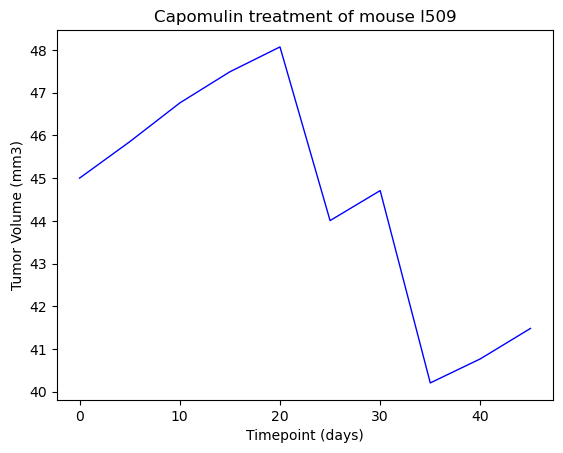

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#creating empty lists for one mouse's timepoints and volumes
capo1mouse_tp = []
capo1mouse_vol = []

#inputting values into the above lists, copy pasted "l509" from result from above code
for index, mouse_data in great_TP_merge.iterrows():
    if (mouse_data['Mouse ID'] == 'l509'):
        capo1mouse_tp.append(mouse_data['Timepoint'])
        capo1mouse_vol.append(mouse_data['Tumor Volume (mm3)'])

#plotting the lists as plot points
capomouse_line = plt.plot(capo1mouse_tp, capo1mouse_vol, color="blue", linewidth = 1)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509");


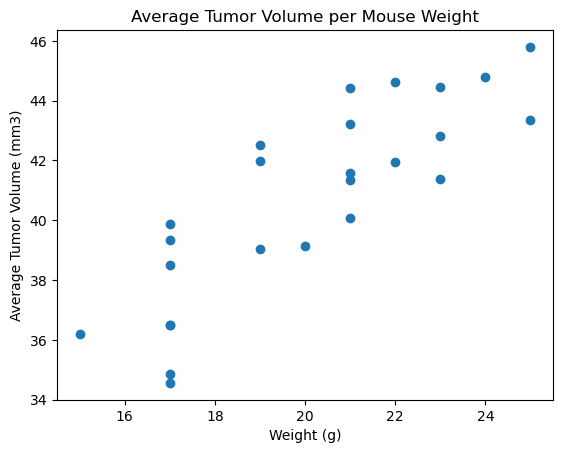

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# average tumor volume for each mouse ID and put into list
avg_tumor_vol = filter_capo_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().tolist()

#average weight for each mouse ID and put into list
mouse_weight = filter_capo_mouse.groupby('Mouse ID')['Weight (g)'].mean().tolist()


tv_per_weight = pd.DataFrame({'Weight (g)': mouse_weight, 'Average Tumor Volume (mm3)': avg_tumor_vol})
tv_per_weight

#creating scatter plot based on dataframe created above
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title('Average Tumor Volume per Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


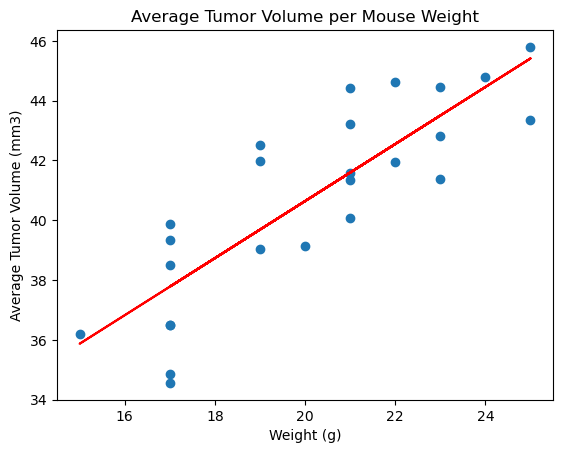

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#converting mouse weight to array
mouse_weight_array = np.array(mouse_weight)

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight_array, avg_tumor_vol)
regress_values = mouse_weight_array * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight_array, avg_tumor_vol)
plt.plot(mouse_weight_array,regress_values,"r-")
plt.title('Average Tumor Volume per Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}')